# Read ME  
##  Adam Shirley  
## bsa919adam@gmail.com  
## CPSC 438 Project4  

### This project looks at and examines realestate data from California and tries to create an accurate model using the sklearn library and the pandas library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

dataset =  datasets.fetch_california_housing(as_frame = True)
frame = dataset.frame
data = dataset.data
target =  dataset.target

frame


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Experiment 2

In [5]:
data_train, data_test, target_train, target_test = ms.train_test_split(data, target, test_size  = 0.2, random_state = (2021-3-25)) 

### Experiment 3

In [6]:

model_linear_brms = lm.LinearRegression(fit_intercept= True).fit(np.array([data_train.AveBedrms,]).T, target_train)
print(model_linear_brms.coef_)
print(model_linear_brms.intercept_)

predictions = model_linear_brms.predict(np.array([data_train.AveBedrms]).T)
mse_train = mse(target_train, predictions)
print("train mse = ", mse_train)

predictions = model_linear_brms.predict(np.array([data_test.AveBedrms]).T)
test_mse = mse(target_test, predictions)
print("test mse = ", test_mse)


[-0.13548919]
2.217305746472891
train mse =  1.3278477256171917
test mse =  1.3323730132311569


### Experiment 4

In [7]:
print("training r^2 = ",  model_linear_brms.score(np.array([data_train.AveBedrms]).T, target_train))
print("test r^2 = ", model_linear_brms.score(np.array([data_test.AveBedrms]).T, target_test))

training r^2 =  0.0028776656256584987
test r^2 =  -0.0010086368172135263


Both of the R^2 values are verey low and as such the model does not do a very good job at acounting for the variability in the model

### Experiment 5

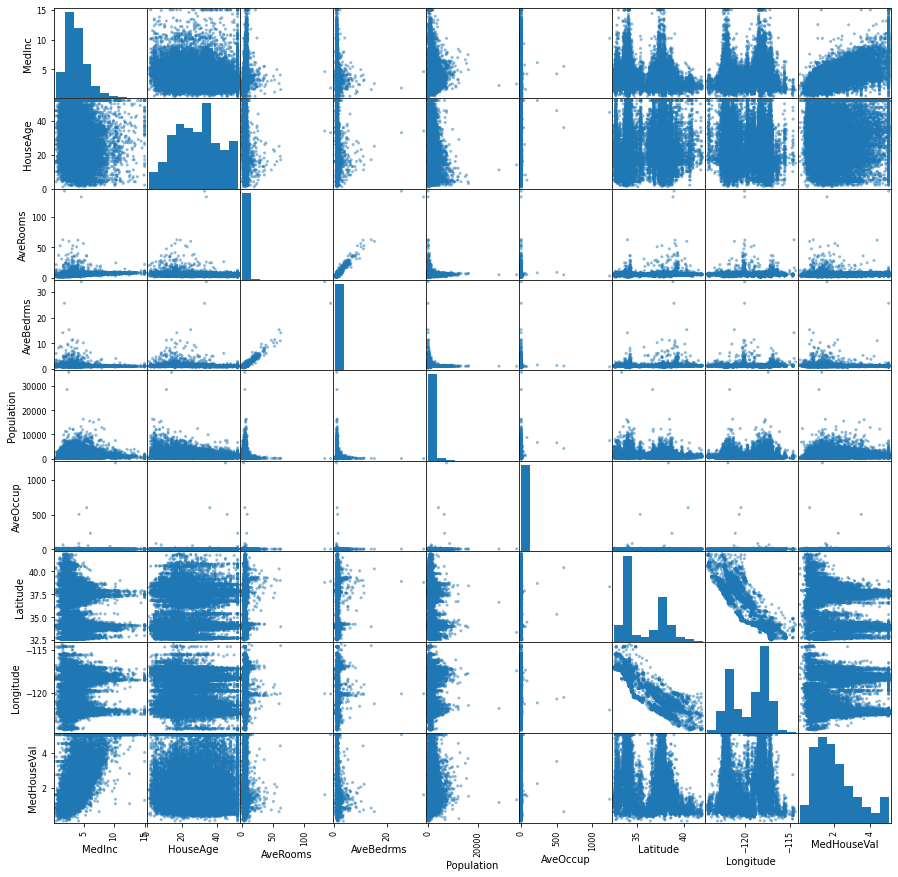

In [5]:
pd.plotting.scatter_matrix(frame, figsize = (15, 15));


### Experiment 6

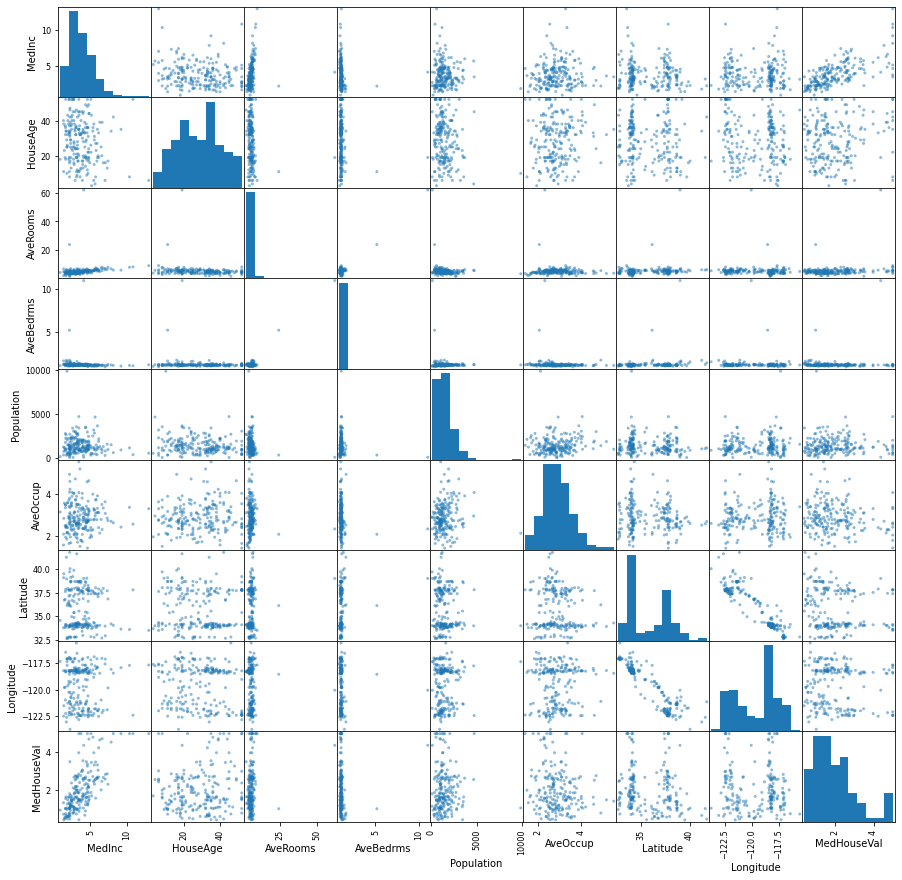

In [6]:
pd.plotting.scatter_matrix(frame.sample(frac = 0.01), figsize = (15, 15));

The aveBdrms features appears to have little to no effect on the MedHouseVal due to the fact that the value of the variable itself seems to vary so little as is visible form the histogram. This explains the low R^2 beacuause the number of average bedrooms seems to have very little effect on the variance of the MedhousVal

### Experiment 7
The variable with the most linear relationship with MedHouseVal appears to be MedInc

### Experiment 8

It is obsevable that most of the best defining data is for the cheaper home in the areas above 40 deg adn further west than 122 deg having those areas be more rural adn less populated while if you look at the longitude and latitude of the homes in areas like los angeles and areas that have more big cities have a mix of both low median value houses and some of the highest median home values.

### Experiment 9


In [7]:
frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


According to the Co variance matrix I was correct in that it appears MedInc appears to be the the best predictor fo MedHouseVal

### Experiment 10

In [8]:
model_linear_medi = lm.LinearRegression(fit_intercept= True).fit(np.array([data_train.MedInc,]).T, target_train)
print(model_linear_brms.coef_)
print(model_linear_brms.intercept_)

predictions = model_linear_brms.predict(np.array([data_train.MedInc]).T)
mse_train = mse(target_train, predictions)
print("train mse = ", mse_train)

predictions = model_linear_brms.predict(np.array([data_test.MedInc]).T)
test_mse = mse(target_test, predictions)
print("test mse = ", test_mse)


[-0.13548919]
2.217305746472891
train mse =  1.9448376575749888
test mse =  1.9590954729502617


In [9]:
print("training r^2 = ",  model_linear_medi.score(np.array([data_train.MedInc]).T, target_train))
print("test r^2 = ", model_linear_medi.score(np.array([data_test.MedInc]).T, target_test))

training r^2 =  0.468045955604915
test r^2 =  0.49497685569639605


The Model does much better than the previous

### Experiment 11

In [10]:
model_linear_all = lm.LinearRegression(fit_intercept= True).fit(data_train, target_train)
print(model_linear_all.coef_)
print(model_linear_all.intercept_)

predictions = model_linear_all.predict(data_train)
mse_train = mse(target_train, predictions)
print("train mse = ", mse_train)

predictions = model_linear_all.predict(data_test)
test_mse = mse(target_test, predictions)
print("test mse = ", test_mse)


[ 4.33059824e-01  9.06514166e-03 -1.06785291e-01  6.07740427e-01
 -4.71911650e-06 -3.90502720e-03 -4.28850708e-01 -4.42420848e-01]
-37.554391758523536
train mse =  0.5296444457890024
test mse =  0.504776723963131


In [11]:
print("training r^2 = ",  model_linear_all.score(data_train, target_train))
print("test r^2 = ", model_linear_all.score(data_test, target_test))

training r^2 =  0.6022734414610222
test r^2 =  0.6207624626635024


The model with all features performs better than the previous models 

### Experiment 12

In [12]:
poly = PolynomialFeatures(2)
data_poly_train = poly.fit_transform(data_train)
data_poly_test = poly.fit_transform(data_test)


In [13]:
model_poly =  lm.LinearRegression(fit_intercept = True).fit(data_poly_train, target_train)
print(model_poly.coef_)
print(model_poly.intercept_)

predictions =  model_poly.predict(data_poly_train)
train_mse = mse( target_train, predictions)
print("train mse = ", train_mse)

predictions = model_poly.predict(data_poly_test)
test_mse = mse(target_test, predictions)
print("test mse = ", test_mse)


[-1.34162431e-08 -1.16313190e+01 -8.51832717e-01  6.62114228e+00
 -3.19738692e+01  1.72205715e-04  2.55709375e+00  9.54592453e+00
  6.55880604e+00 -3.28366692e-02  1.81477205e-03  4.87329569e-02
 -1.90714486e-01  6.13704531e-05 -6.66862451e-03 -1.58064802e-01
 -1.49053581e-01  2.04256505e-04 -1.55817803e-03  9.70706614e-03
  2.36541537e-06 -2.10467971e-03 -1.00810493e-02 -1.00650366e-02
  8.21661524e-03 -8.44031739e-02 -7.69831352e-05  3.07129043e-02
  9.20581705e-02  8.51356249e-02  2.05624669e-01  5.32873948e-04
 -1.37624961e-01 -4.63896771e-01 -4.16322231e-01  2.42166744e-09
  2.14758854e-05  2.06115499e-05  1.18904938e-05  9.51349923e-05
  3.32694375e-02  3.22538349e-02  6.74639754e-02  1.18622758e-01
  4.44766229e-02]
228.45155427062053
train mse =  0.4243322251744533
test mse =  0.6463802896851947


In [14]:
print("training r^2 = ",  model_poly.score(data_poly_train, target_train))
print("test r^2 = ", model_poly.score(data_poly_test, target_test))

training r^2 =  0.6813556774971732
test r^2 =  0.5143760446827386


Yes it appears to be overfitting because the test MSE has increased from the last model as well as the test R^2 has gotten closer to zero

### Experiment 13

In [15]:
ridge = lm.Ridge(alpha = 1.0 , normalize = True)
ridge.fit(data_poly_train, target_train)
print(ridge.coef_)
print(ridge.intercept_)

predictions =  ridge.predict(data_poly_train)
train_mse = mse( target_train, predictions)
print("train mse = ", train_mse)

predictions = ridge.predict(data_poly_test)
test_mse = mse(target_test, predictions)
print("test mse = ", test_mse)


[ 0.00000000e+00  6.77199652e-02  1.60834992e-03 -6.37481306e-03
 -7.48765176e-03 -4.65979478e-06 -9.86361681e-04 -3.01939308e-02
 -2.83332171e-02  3.47143462e-03  1.44384912e-03  3.84615480e-03
  3.56406268e-02  1.05385445e-05  3.26629396e-05  1.83264758e-03
 -5.75095542e-04  3.94981966e-05  3.24102843e-06  6.59985926e-04
  6.38179282e-07 -7.75689445e-06  2.89473879e-05 -1.50923327e-05
 -4.81817523e-05 -2.58439013e-04 -2.06784184e-06 -9.64017124e-05
 -2.55803871e-04  4.54598313e-05 -1.08804034e-03 -1.54876400e-06
 -1.01665626e-03 -7.09700426e-04  2.25254179e-05 -3.62408028e-10
  5.64365839e-08 -2.06776815e-07  2.79149311e-08  3.55559513e-07
 -2.61284993e-05  7.65054293e-06 -4.28430012e-04  1.19572544e-04
  1.17961883e-04]
-2.1657890341807873
train mse =  0.6457457247916447
test mse =  0.6190711914117145


In [16]:
print("training r^2 = ",  ridge.score(data_poly_train, target_train))
print("test r^2 = ", ridge.score(data_poly_test, target_test))

training r^2 =  0.5150893644697001
test r^2 =  0.534893304462077


This model does performs better  than the previous polynomial model but still performs worse than the linear model that uses all the features of the model